In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

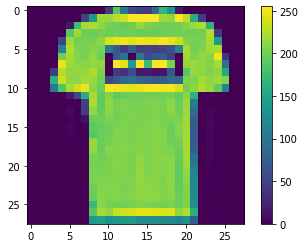

In [6]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images/255.0
test_images = test_images / 255.0

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.4994 - accuracy: 0.8246
Epoch 2/10
60000/60000 [==============================] - 10s 166us/sample - loss: 0.3758 - accuracy: 0.8658
Epoch 3/10
60000/60000 [==============================] - 9s 156us/sample - loss: 0.3368 - accuracy: 0.8782
Epoch 4/10
60000/60000 [==============================] - 9s 144us/sample - loss: 0.3141 - accuracy: 0.8863
Epoch 5/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.2962 - accuracy: 0.8920
Epoch 6/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.2825 - accuracy: 0.8951
Epoch 7/10
60000/60000 [==============================] - 11s 176us/sample - loss: 0.2709 - accuracy: 0.9007
Epoch 8/10
60000/60000 [==============================] - 11s 192us/sample - loss: 0.2592 - accuracy: 0.9042
Epoch 9/10
60000/60000 [==============================] - 13s 213us/sample - loss: 0.2501 - accuracy: 0.9075
E

### Evaluation

In [11]:
test_Loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test accuracy:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test accuracy: 0.8722


### Predictions

In [12]:
predictions = model.predict(test_images)
predictions[0]

array([2.57771433e-07, 4.45251856e-11, 6.65966269e-08, 1.19210652e-09,
       7.17975768e-09, 2.57401611e-03, 4.22723332e-08, 1.52879227e-02,
       1.16925435e-07, 9.82137561e-01], dtype=float32)

In [13]:
np.argmax(predictions[0])

9

In [14]:
test_labels[0]

9

### Verifying Predictions

In [15]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]
    
    show_image(image, class_names[correct_label], predicted_class)
    
def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Excpected: " + label)
    plt.xlabel("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()
    
def get_number():
    while True:
        num = input('pick a number: ')
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return int(num)
            else:
                print("Try again...")

pick a number: 10


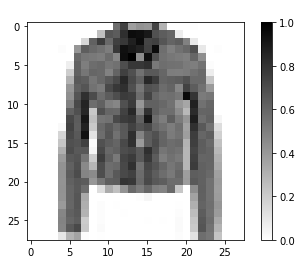

In [16]:
num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)